In [1]:
exec(open("./autoencoderhelperfunctions.py").read())
df = pd.read_csv("./102520_gazet.csv", index_col = 0)
labels1 = pd.read_csv('./102420_gazetvecs.csv', index_col = 0)
labels2 = labels1[~labels1.text.str.contains('і')].copy()
labels3 = labels2[~labels2.text.str.contains('журналист')].copy()
#labels4 = labels3[~labels3.text.str.contains('стихии')].copy()
#labels = labels4[~labels4.text.str.contains('стихает')].copy()
labels = labels3.dropna()
labels = labels.reset_index(drop = True)

C:\Users\madke\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
og= df[['0','1','2']]

done
done
Accuracy: 0.9995014955134596


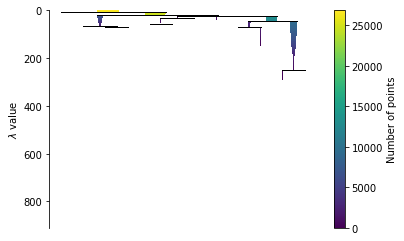

In [4]:
og2 = np.array(og) 
svm_ = return_hdbscansvm(og2, rf = True, svmc= 1000, txt_col = labels['text'], clust_size = 75, samp_size = 75, svmx = False, clust_metric = 'manhattan')

make_graph(og2, svm_[0]['text'], svm_[1], colors = "Inferno", PCA = False)
#X1 = og
%matplotlib inline
svm_[2].condensed_tree_.plot(select_clusters = False)

In [5]:
dice = range(0,12)
for_tatyana = []
for i in dice:
    temp = svm_[0][svm_[0][i] == 1]
    res = temp['text'].sample(n=10, random_state=7)
    res = res.reset_index(drop = True)
    for_tatyana.append(res)
    
    
for j, i in enumerate(for_tatyana):
    print('\n')
    print('TOPIC' + ' ' + str(j) + '\n')
    for n in i:
        print(n)



TOPIC 0

('В газете содержатся злобные выпады против Советского Союза, клевета на руководителей КПЧ и призывы к их физическому уничтожению.', 0)
('Рассказывая об этом, наши газеты делают вывод, что дело оказания помощи голодающим Лигой Наций потерпело полную неудачу.', 0)
('Организовали распределение центральных газет среди бойцов царандоя.', 0)
('Один из комментаторов удивляется: почему правительство так панически боится подпольных журналов, запрещенных выступлений?', 0)
('Чувства зависимости, гнета, боязнь и трусость известной части французского населения уступают [место] надеждам на будущее Франции под влиянием писем, газет независимой части этой благородной страны.', 0)
('Судя по отрывочным сведениям б[ольшевистс]ких газет, все западные социалисты, даже левые фракции, за исключением отдельных, немногих лиц, отвернулись от московского интернационала и открещиваются от солидарности с нашими коммунистами.', 0)
('По газетам ожидание окончательного натиска врага.', 0)
('Правительство,

In [33]:
 svm_[1]

array([15, 21, 18, ..., 16,  6,  9])

In [6]:
df['entry_type'] =  svm_[1]
df.to_csv('./102920_gazetcats.csv')